# In-depth internals

> In-depth explanation of internal of MonoDense layer

In [1]:
#| hide
# from contextlib import contextmanager
# from datetime import datetime
# from functools import lru_cache
from typing import *

import numpy as np
# import tensorflow as tf
# from numpy.typing import ArrayLike, NDArray
# from tensorflow.keras.layers import Concatenate, Dense, Dropout
from tensorflow.types.experimental import TensorLike
from os import environ

from mono_dense_keras import MonoDense
from mono_dense_keras._components.mono_dense_layer import get_activation_functions

2023-06-01 13:45:03.394553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#| hide

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
# import pandas as pd
# import pytest
# import seaborn as sns
# from tensorflow.keras import Model
# from tensorflow.keras.layers import Input

In [3]:
#| hide

environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

### Actvation Functions

We use $\breve{\mathcal{A}}$ to denote the set of all zero-centred, monotonically increasing, convex, lower-bounded functions.

Let $\breve{\rho} \in \breve{\mathcal{A}}$. Then

$$
\hat{\rho}(x) = -\breve{\rho}(-x)
$$

$$
\tilde{\rho}(x) = \begin{cases}
      \breve{\rho}(x+1)-\breve{\rho}(1) & \text{if }x < 0\\
      \hat{\rho}(x-1)+\breve{\rho}(1) & \text{otherwise}
    \end{cases} 
$$

In [20]:
# | hide

def plot_activation_functions(
    activation: Optional[Union[str, Callable[[TensorLike], TensorLike]]] = None,
    *,
    font_size: int = 20,
    save_pdf: bool = False,
    save_path: Union[Path, str] = "plots",
    linestyle="--",
    alpha=0.7,
    linewidth=4.0,
) -> None:
    font = {"size": font_size}
    matplotlib.rc("font", **font)
    (
        convex_activation,
        concave_activation,
        saturated_activation,
    ) = get_activation_functions(activation)
    plt.rcParams["figure.figsize"] = (9, 6)

    x = np.arange(-3.5, 3.5, 0.1)
    plot_kwargs = dict(linestyle=linestyle, alpha=alpha, linewidth=linewidth)
    plt.plot(x, convex_activation(x), label=r"$\breve{\rho}(x)$", **plot_kwargs)
    plt.plot(x, concave_activation(x), label=r"$\hat{\rho}(x)$", **plot_kwargs)
    plt.plot(x, saturated_activation(x), label=r"$\tilde{\rho}(x)$", **plot_kwargs)
    plt.legend()

    title = f"{activation.__name__ if hasattr(activation, '__name__') else activation}-based activations"
    plt.title(title)
    if save_pdf:
        for file_format in ["pdf", "png"]:
            path = Path(save_path) / (title.replace(" ", "_") + f".{file_format}")
            path.parent.mkdir(exist_ok=True, parents=True)
            plt.savefig(path, format=file_format)
            print(f"Saved figure to: {path}")

    plt.show()

Saved figure to: plots/linear-based_activations.pdf
Saved figure to: plots/linear-based_activations.png


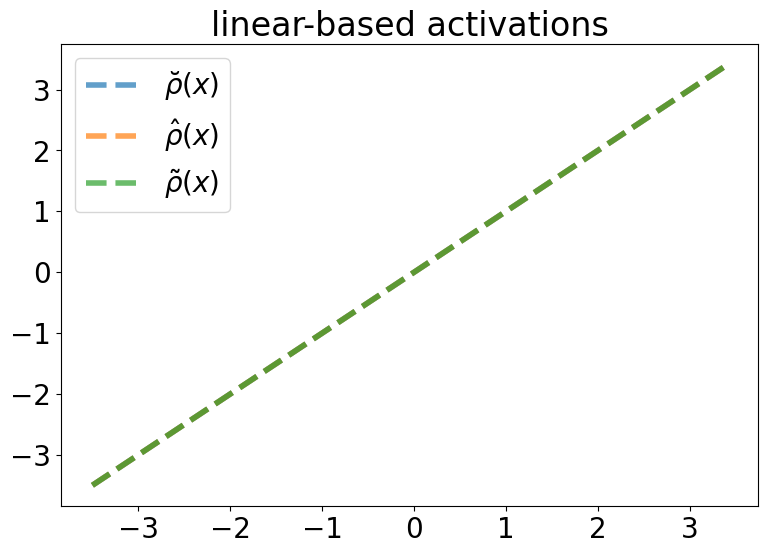

Saved figure to: plots/ReLU-based_activations.pdf
Saved figure to: plots/ReLU-based_activations.png


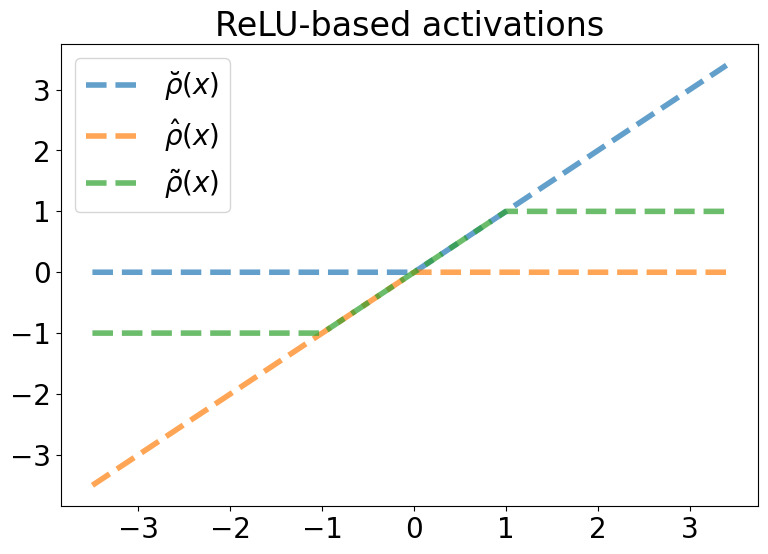

Saved figure to: plots/ELU-based_activations.pdf
Saved figure to: plots/ELU-based_activations.png


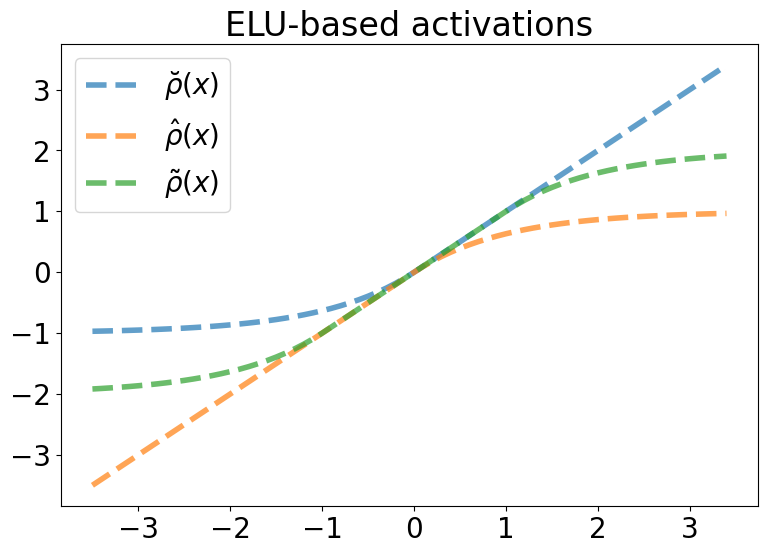

Saved figure to: plots/SELU-based_activations.pdf
Saved figure to: plots/SELU-based_activations.png


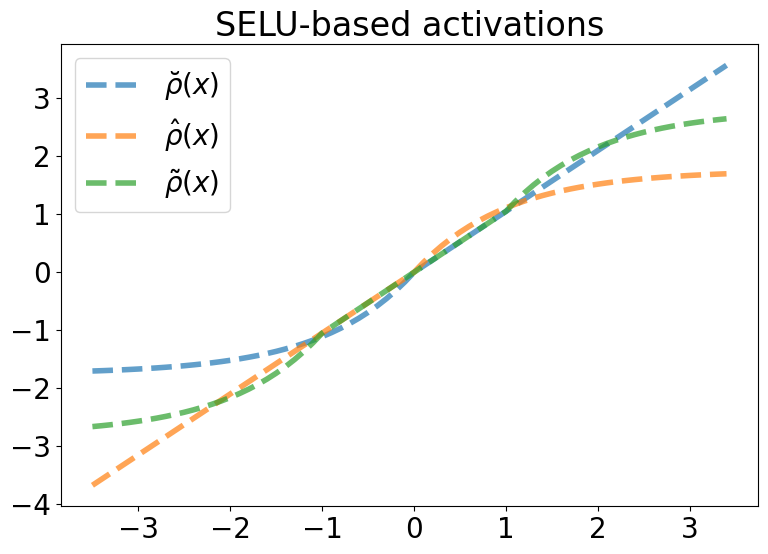

In [19]:
# | hide

for activation in ["linear", "ReLU", "ELU", "SELU"]:
    plot_activation_functions(activation, save_pdf=True)

![ReLU-based_activations](images/ReLU-based_activations.png) ![ELU-based_activations](images/ELU-based_activations.png) 


The plots below shows examples of activation function triplets generated from ReLU and ELU activations:

![ReLU-based_activations](plots/ReLU-based_activations.png) ![ELU-based_activations](plots/ELU-based_activations.png) 